## Pytorch work flow end - to end
- 1 -prepare data]
- 2 - build model
- 3 - fitting model
- 4 - making predictions
- 5 - saving and loading model
- 6 - putting it all together

In [1]:
import torch
from torch import nn #nn contains pytroch building blocks for all neural networs
import matplotlib.pyplot as plt
torch.__version__

'1.13.1+cu116'

#### Data preparation and loading

In [3]:
#creating some known data using linear regression with known parameters
weight = 0.7
bias = 0.3
#creating data
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias
X[:10],y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [5]:
#splitting data into training and test set
train_split = int(0.8 * len(X))
X_train,y_train = X[:train_split],y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]
len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

In [6]:
def plot_predictions(train_data=X_train,train_labels=y_train,test_data=X_test,test_labels=y_test,predictions=None):
  plt.figure(figsize=(6,4))
  plt.scatter(train_data,train_labels,c="b",s=4,label="Training data")
  plt.scatter(test_data,test_labels,c="g",s=4,label="Testing data")
  if predictions is not None:
    plt.scatter(test_data,predictions,c="r",s=4,label="predictions")
  plt.legend(prop={"size":14});




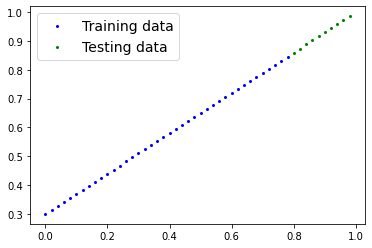

In [ ]:
plot_predictions();

#### Building pytorch model

Link - for OOP visit below
- visit https://realpython.com/python3-object-oriented-programming/

In [ ]:
# create a linear regression model class - #almost everything inherits from nn.mo
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.rand(1,requires_grad=True,dtype=torch.float))

    self.bias = nn.Parameter(torch.rand(1,requires_grad=True,dtype=torch.float))

    #Forward method to define compuataion
  def forward(self,x:torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias
    


### Pytorch model building essentials
- torch.nn contains conatins all  the building blocks in neural network
- torch.Parameter - Defines parameters to be used by model
- torch.optim - this is where the optimization algorithm comes into place
- def forward - All nn.module subclasses rquire you to 

In [ ]:
#Check a random seed
torch.manual_seed(42)
#create instance of model
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True), Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [ ]:
#list name of parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

In [ ]:
weight,bias

(0.7, 0.3)

In [ ]:
#Get how well the created model can predict y_test based on x_test
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]])

In [ ]:
y_train

tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260],
        [0.4400],
        [0.4540],
        [0.4680],
        [0.4820],
        [0.4960],
        [0.5100],
        [0.5240],
        [0.5380],
        [0.5520],
        [0.5660],
        [0.5800],
        [0.5940],
        [0.6080],
        [0.6220],
        [0.6360],
        [0.6500],
        [0.6640],
        [0.6780],
        [0.6920],
        [0.7060],
        [0.7200],
        [0.7340],
        [0.7480],
        [0.7620],
        [0.7760],
        [0.7900],
        [0.8040],
        [0.8180],
        [0.8320],
        [0.8460]])

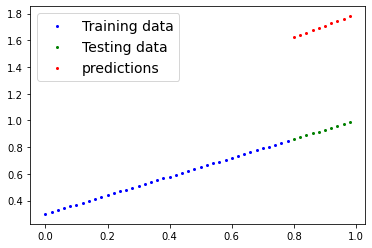

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
#Define loss function
loss_fn = nn.L1Loss()
#set up optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(),lr=0.01)

### Building training and testing loops

- loop through data
- forward pass (same as forward propagation)
- calculate loss (compare forward pass predictions to truth labels
- Loss backward - move backward through network to calculate gradient of model parameters wrt loss
- Optimizer step - use the optimizer to adjust model paramaters

In [ ]:
#torch.manual_seed(42)
epochs = 200 #An epoch is one loop through in data
#Tracking experiment
epoch_count = []
loss_values = []
test_loss_values = []
## Training
for epoch in range(epochs):
  #set model to training
  model_0.train() #set all parameters that require gradient to require gradient
  # 1 forward pass
  y_pred = model_0(X_train)
  # 2 calculate loss
  loss = loss_fn(y_pred,y_train)
  # 3 optimser zero grad
  optimizer.zero_grad() #zero gradients of optimizer
  # 4 perform back propagation on the loss
  loss.backward()

  # 5Set the optimizer(performs gradient descent)
  optimizer.step() # how optimizer changes will accumulate
  
  ## Testing loop
  model_0.eval() #Turns off parameters not needed for evaluation
  with torch.inference_mode():
    test_pred = model_0(X_test)
    test_loss = loss_fn(test_pred,y_test)
  
  if epoch % 10 == 0:
      epoch_count.append(epoch)
      test_loss_values.append(loss)
      loss_values.append(test_loss)
      print(f"Epoch:{epoch} | Loss:{loss} | Test loss:{test_loss}")





 
print(model_0.state_dict())


Epoch:0 | Loss:0.6860889196395874 | Test loss:0.7637526988983154
Epoch:10 | Loss:0.5708791017532349 | Test loss:0.6290428042411804
Epoch:20 | Loss:0.45566922426223755 | Test loss:0.4943329691886902
Epoch:30 | Loss:0.34045934677124023 | Test loss:0.35962313413619995
Epoch:40 | Loss:0.2252494841814041 | Test loss:0.2249133139848709
Epoch:50 | Loss:0.1100396141409874 | Test loss:0.09020347893238068
Epoch:60 | Loss:0.009724985808134079 | Test loss:0.020998019725084305
Epoch:70 | Loss:0.006216754671186209 | Test loss:0.014099234715104103
Epoch:80 | Loss:0.002788322512060404 | Test loss:0.005826681852340698
Epoch:90 | Loss:0.007095950655639172 | Test loss:0.00754010071977973
Epoch:100 | Loss:0.007095950655639172 | Test loss:0.00754010071977973
Epoch:110 | Loss:0.007095950655639172 | Test loss:0.00754010071977973
Epoch:120 | Loss:0.007095950655639172 | Test loss:0.00754010071977973
Epoch:130 | Loss:0.007095950655639172 | Test loss:0.00754010071977973
Epoch:140 | Loss:0.007095950655639172 | Te

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6977])), ('bias', tensor([0.3080]))])

In [ ]:
import numpy as np
loss_values, test_loss_values

([tensor(0.7638),
  tensor(0.6290),
  tensor(0.4943),
  tensor(0.3596),
  tensor(0.2249),
  tensor(0.0902),
  tensor(0.0210),
  tensor(0.0141),
  tensor(0.0058),
  tensor(0.0075),
  tensor(0.0075),
  tensor(0.0075),
  tensor(0.0075),
  tensor(0.0075),
  tensor(0.0075),
  tensor(0.0075),
  tensor(0.0075),
  tensor(0.0075),
  tensor(0.0075),
  tensor(0.0075)],
 [tensor(0.6861, grad_fn=<MeanBackward0>),
  tensor(0.5709, grad_fn=<MeanBackward0>),
  tensor(0.4557, grad_fn=<MeanBackward0>),
  tensor(0.3405, grad_fn=<MeanBackward0>),
  tensor(0.2252, grad_fn=<MeanBackward0>),
  tensor(0.1100, grad_fn=<MeanBackward0>),
  tensor(0.0097, grad_fn=<MeanBackward0>),
  tensor(0.0062, grad_fn=<MeanBackward0>),
  tensor(0.0028, grad_fn=<MeanBackward0>),
  tensor(0.0071, grad_fn=<MeanBackward0>),
  tensor(0.0071, grad_fn=<MeanBackward0>),
  tensor(0.0071, grad_fn=<MeanBackward0>),
  tensor(0.0071, grad_fn=<MeanBackward0>),
  tensor(0.0071, grad_fn=<MeanBackward0>),
  tensor(0.0071, grad_fn=<MeanBackwar

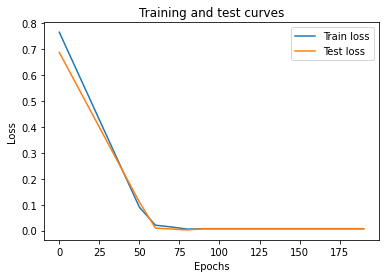

In [ ]:
#plot loss curves
plt.plot(epoch_count,np.array(torch.tensor(loss_values).numpy()),label="Train loss")
plt.plot(epoch_count,np.array(torch.tensor(test_loss_values).numpy()),label="Test loss")
plt.title("Training and test curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();


In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

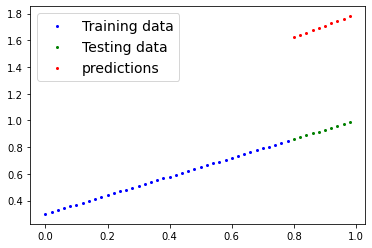

In [ ]:
plot_predictions(predictions=y_preds)


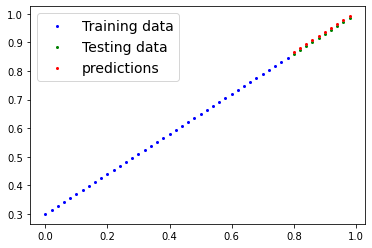

In [ ]:
plot_predictions(predictions=y_preds_new)

### Saving model in pytroch - There are three main methods in saving and loading
 - torch.save() - i pickle format
 - torch.load() - to load a saved mpdel
 - torch.nn.Module.load_state_dict() - saves method parameters in dictionary

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6977])), ('bias', tensor([0.3080]))])

In [ ]:
#saving pytroch model
from pathlib import Path
#Create model directori
model_path = Path("models")
model_path.mkdir(parents=True,exist_ok=True)
model_name = "01_model_o.pth"
model_save_path = model_path/model_name
print(model_save_path)

#Save model in state dict
print("Saving model -----------")
torch.save(obj=model_0.state_dict(),f=model_save_path)
print("Saving complete")

models/01_model_o.pth
Saving model -----------
Saving complete


In [ ]:
# Loading pytorch models back
#instantiate a new class of the model class
loaded_model_0 = LinearRegressionModel()

OrderedDict([('weights', tensor([0.8694])), ('bias', tensor([0.5677]))])

In [ ]:
loaded_model_0.load_state_dict(torch.load(model_save_path))

<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6977])), ('bias', tensor([0.3080]))])

In [ ]:
#make predictions with our model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)
loaded_model_preds

tensor([[0.8661],
        [0.8801],
        [0.8940],
        [0.9080],
        [0.9220],
        [0.9359],
        [0.9499],
        [0.9638],
        [0.9778],
        [0.9917]])

In [ ]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [ ]:
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

### Putting it all together

In [7]:
import torch
from torch import nn
import matplotlib.pyplot as plt
#check pytorch version
torch.__version__

'1.13.1+cu116'

Device Agnostic code

In [8]:
#set up device agnostic codes
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f'Available device {device}')

Available device cpu


In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



Data

In [ ]:
#Creating some data using linear regression y = weights * features + bias
weight = 0.7
bias = 0.2
#create some range values
start = 0
end = 1
step = 0.02
#Create X and y
X = torch.arange(start,end,step).unsqueeze(dim=1)
y =  weight * X + bias

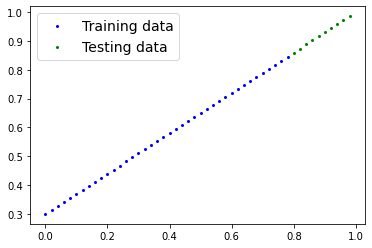

In [9]:
#Split data
train_split = int(0.8 * len(X))
x_train,y_train = X[:train_split],y[:train_split]
x_test,y_test = X[train_split:],y[train_split:]
plot_predictions()

Building a pytorch linear model

In [11]:
#Create linear model by subclassing nn.Modules 
class LinearRegressionModelv2(nn.Module):
  def __init__(self):
    super().__init__()
    #Use nn.linear() for creating the model parameters - linear transform layer - fully connect layer - Dense layer or probing layer --They are all linear layers
    self.linear_layer = nn.Linear(in_features = 1,out_features = 1)

  def forward(self,x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

torch.manual_seed(42)
model_1 = LinearRegressionModelv2()
model_1 ,model_1.state_dict()

(LinearRegressionModelv2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [12]:
#check model device
next(model_1.parameters()).device

device(type='cpu')

In [20]:
#Set the model to use target
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

Training loop

In [23]:
#Setbup loss function
loss_fn = nn.L1Loss()
#Set up optimizer
optimizer = torch.optim.SGD(params = model_1.parameters(),lr=0.01,)
torch.manual_seed(42)
#Incase of gpu -- put data also on gpu
X_train = X_train.to(device)
y_train  = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)
epochs = 200
for epoch in range(epochs):
  model_1.train()
  #forward pass
  y_pred = model_1(X_train)
  #calcualte loss
  loss = loss_fn(y_train,y_pred)
  #optiizer zero grad
  optimizer.zero_grad()
  #backward propagation
  loss.backward()
  #optimizer step
  optimizer.step()

  #Testing 
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_fn(test_pred,y_test)
  if epoch % 10 == 0:
    print(f'Epoch : {epoch} | Loss:{loss} | Test loss : {test_loss}')

Epoch : 0 | Loss:0.5551779866218567 | Test loss : 0.5739762187004089
Epoch : 10 | Loss:0.4399680495262146 | Test loss : 0.4392663538455963
Epoch : 20 | Loss:0.3247582018375397 | Test loss : 0.30455657839775085
Epoch : 30 | Loss:0.20954827964305878 | Test loss : 0.16984674334526062
Epoch : 40 | Loss:0.09433844685554504 | Test loss : 0.03513689711689949
Epoch : 50 | Loss:0.023886386305093765 | Test loss : 0.04784906655550003
Epoch : 60 | Loss:0.0199567973613739 | Test loss : 0.04580312222242355
Epoch : 70 | Loss:0.016517987474799156 | Test loss : 0.0375305712223053
Epoch : 80 | Loss:0.013089170679450035 | Test loss : 0.029944902285933495
Epoch : 90 | Loss:0.009653178043663502 | Test loss : 0.02167237363755703
Epoch : 100 | Loss:0.006215679459273815 | Test loss : 0.014086711220443249
Epoch : 110 | Loss:0.002787243574857712 | Test loss : 0.005814164876937866
Epoch : 120 | Loss:0.0012645035749301314 | Test loss : 0.013801807537674904
Epoch : 130 | Loss:0.0012645035749301314 | Test loss : 0.

In [25]:
#Check model parameters
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

Making predictions

In [27]:
with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

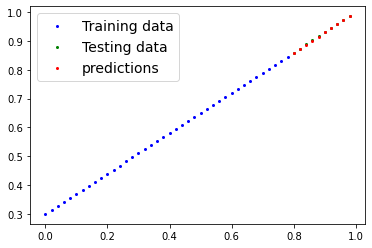

In [28]:
#Visualize predictions
plot_predictions(predictions = y_preds)

Saving and loading trained model

In [33]:
#save model
from pathlib import Path
#create model directory
model_path = Path("models")
model_path.mkdir(parents=True,exist_ok=True)
#Create model save path
model_name = "01_pytorch_model_2.pth"
model_save_path = model_path/ model_name
#save model state dict
print(f"saving model to :{model_save_path}")
torch.save(obj=model_1.state_dict(),f=model_save_path)
print("__________________")
print("Saved successfully")

saving model to :models/01_pytorch_model_2.pth
__________________
Saved successfully


In [34]:
#load model
#Create instance of linear reg model
loaded_model_2 = LinearRegressionModelv2()
loaded_model_2.load_state_dict(torch.load(model_save_path))

<All keys matched successfully>

In [39]:
next(loaded_model_2.parameters()).device

device(type='cpu')

In [40]:
loaded_model_2.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [41]:
#Evaluate loaded model
loaded_model_2.eval()
with torch.inference_mode():
  loaded_preds = loaded_model_2(X_test)
y_preds == loaded_preds 

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

Done_______________________________________________________________________________________________________________________________________________
+++++++++++++++++++++++++++++++++++++++++++++++++
